<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_01/CAP417_HandsOn_01_AlexdeAFernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **UNDER CONSTRUCTION** ###


# **1. Visualizations**

Considering a series of 100 integers as a time series, produce line visualizations, boxplots, pie charts and others;

For the graphs, a set of 1000 points ranging from 1 to 100, called u, was used.
These values were inserted into a vector of 1000 positions. For classification purposes in the boxplots and pie charts, another complementary vector was created and named x, which contains a separation into 8 equal parts of 125 elements, which produces the same number of positions as the u vector.

With this vector it is possible to calculate the average of each 1/8 of the vector, as well as the sum of the elements; to evaluate each part as a boxplot, condensing the information contained, for example, in the linear graph of the time series.

The eight parts can be described as we would do with observations grouped monthly, annually... The decision to divide into 8 pieces comes from Pizza!!! 

Thus, initially the vectors _u_ and _x_ are created.

In [ ]:
# Install necessary packages for plotting
install.packages ("cowplot")
install.packages ("tidyverse")

In [ ]:
require (ggplot2)

seed <- c(10)
n <- 100
r <- 1000

set.seed (seed); u <- sample.int(n, r, replace = TRUE) # sample.int does an uniform distribution

x <- sort(rep(seq (1,8), times = 125))
head (x)

Loading required package: ggplot2



[1] 1 1 1 1 1 1

# **2. Histogram X oriented**

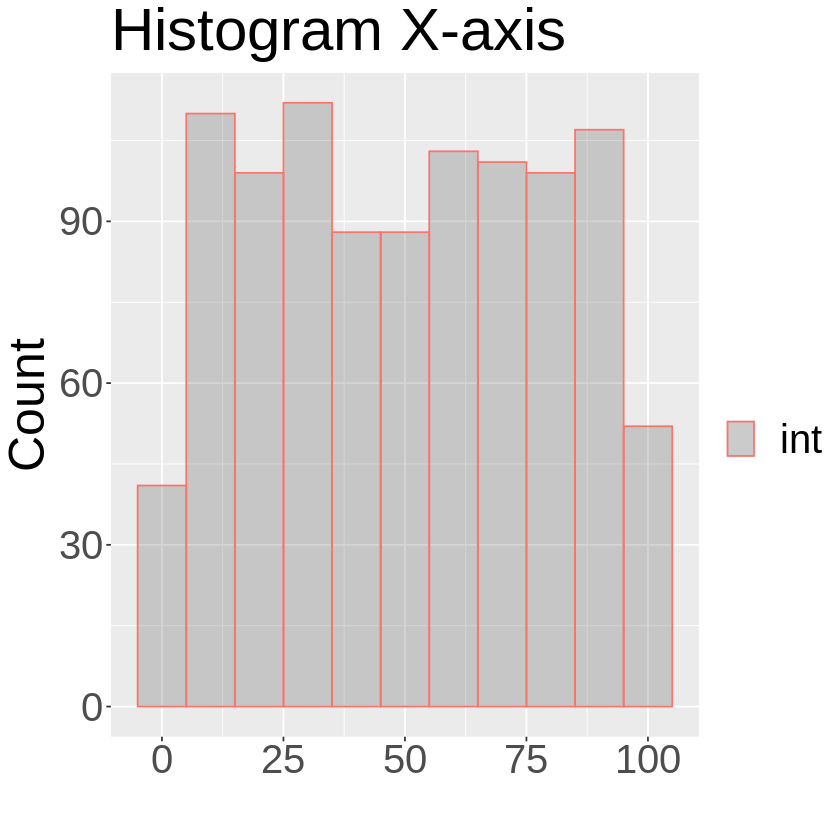

In [ ]:
ggplot () +
  geom_histogram (aes(x=u, color='int'),alpha=0.25, binwidth = 10 ,orientation = 'x') +
  theme(text = element_text(size=30)) + 
  xlab("") + ylab("Count") +  labs(color = "", fill = "") +
  ggtitle ("Histogram X-axis") 

# **3. Histogram Y oriented**

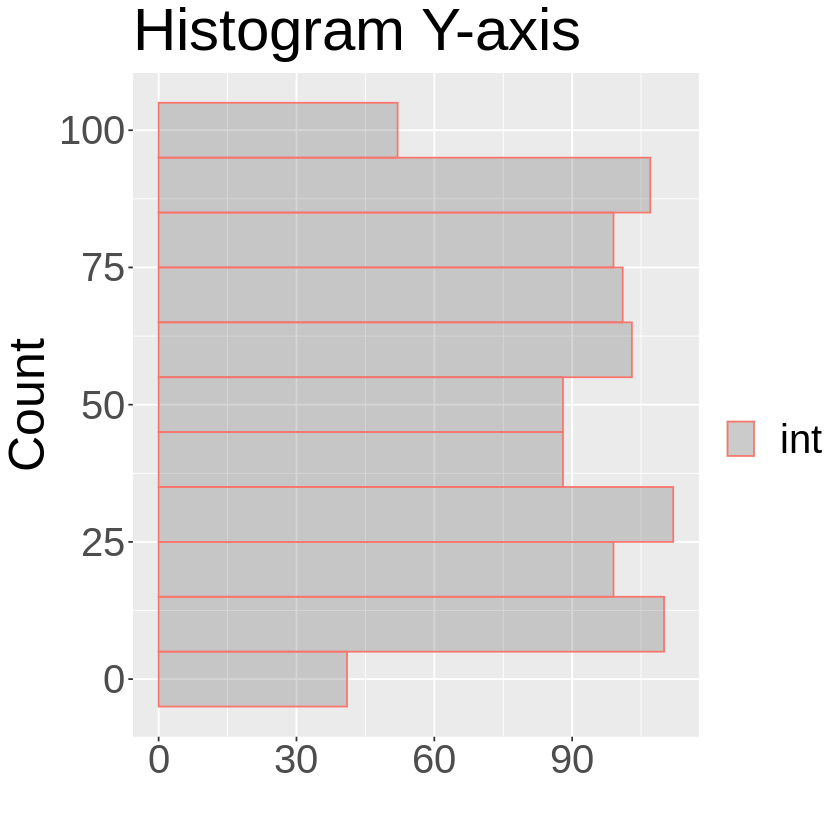

In [ ]:
ggplot () +
  geom_histogram (aes(y=u, color='int'), binwidth=10, alpha=0.25, orientation = 'y') +
  theme(text = element_text(size=30)) + 
  xlab("") + ylab("Count") +  labs(color = "", fill = "") +
  ggtitle ("Histogram Y-axis") 


# **4. Time Series Linear**

Plot of the series of random integers with _x_ varying as if it were a time series; in this case, from 1 to the size of the vector _u_.


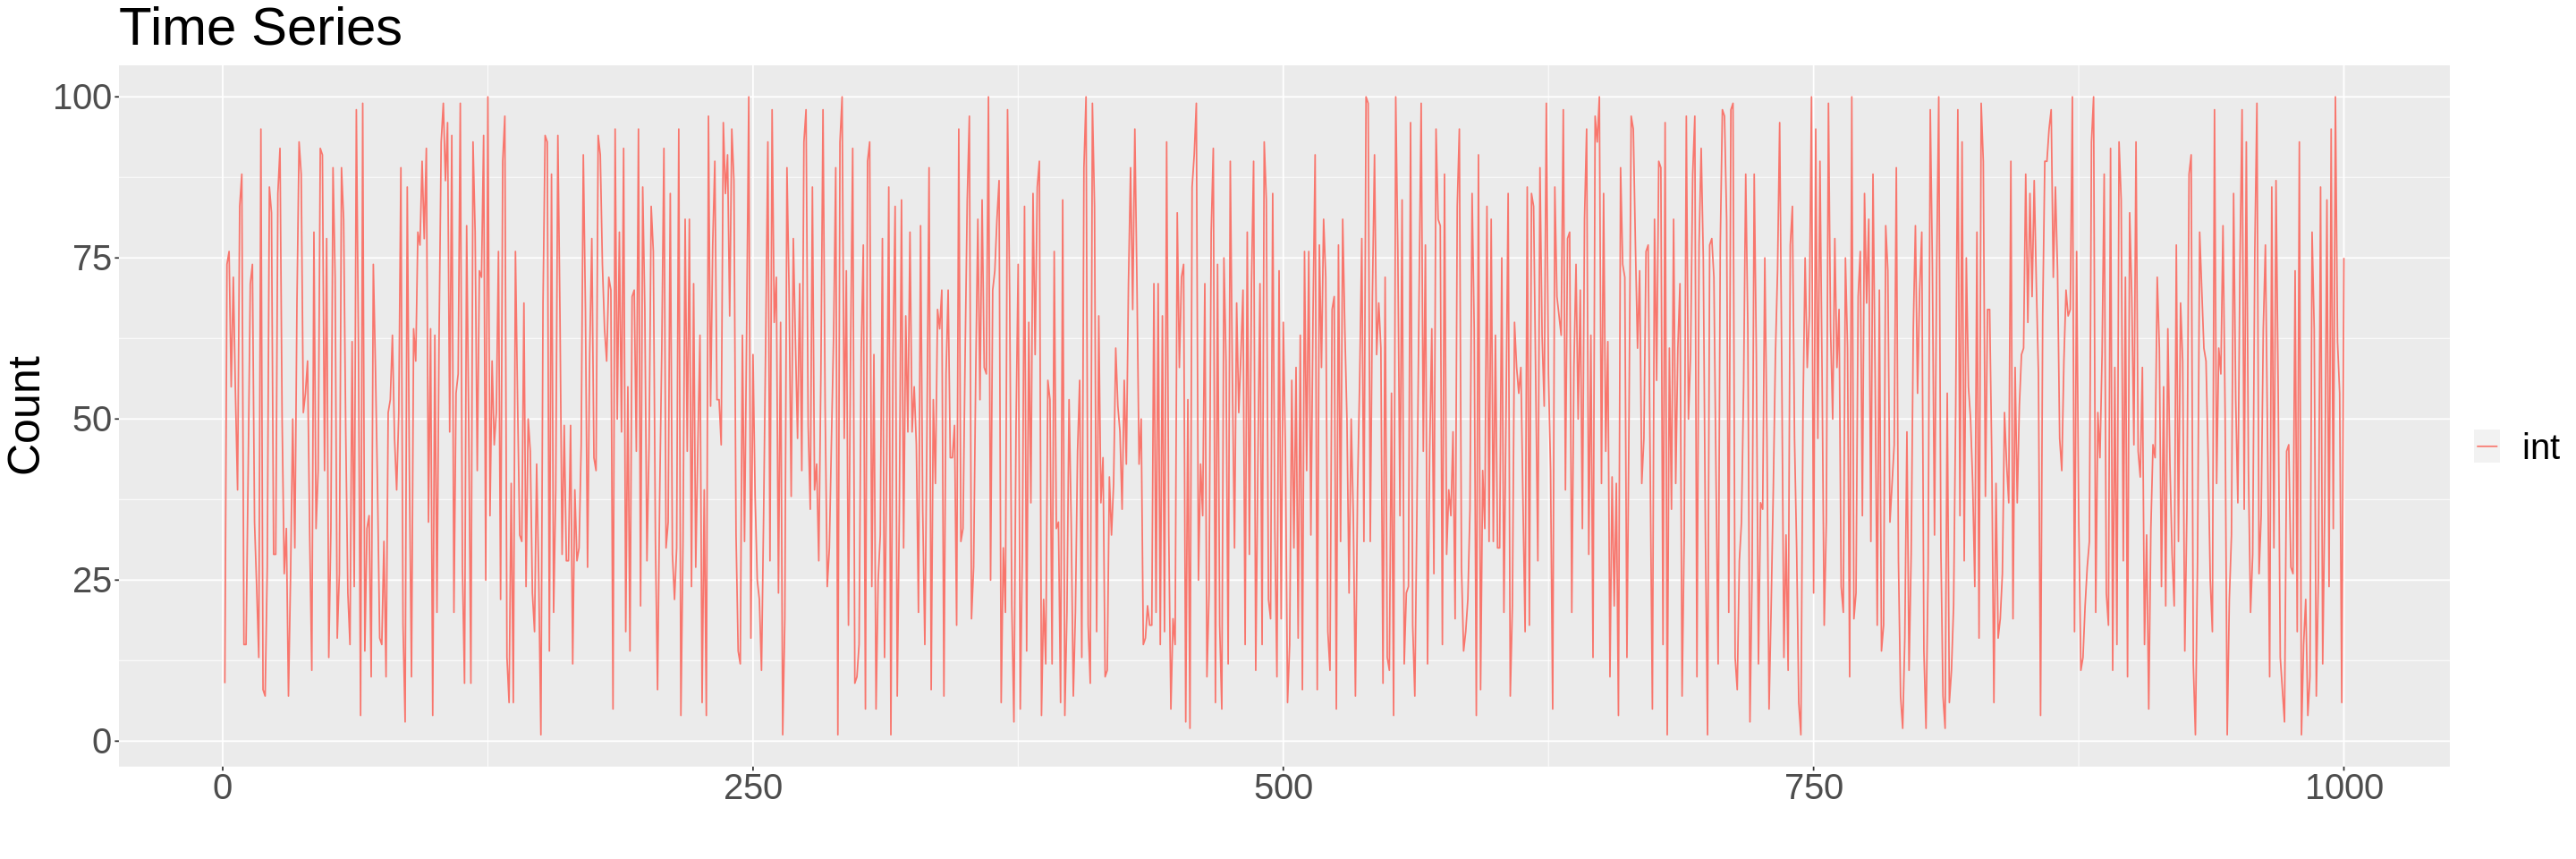

In [ ]:
saved <- options(repr.plot.width=24, repr.plot.height=8)
ggplot () +
  geom_line (aes(x=c(1:length(u)), y=u, color='int')) +
  theme(text = element_text(size=30)) + 
  xlab("") + ylab("Count") +  labs(color = "", fill = "") +
  ggtitle ("Time Series") 
options (saved)

# **5. Boxplot**

Boxplot grouping each eighth part of the vector, showing the variation of the integers in each part, median, percentiles and mean (point in  the box).

For boxplots and pie charts, it is interesting to use _factors_. These factors classify discrete intervals, not continuous ones, allowing calculations to be performed where the factors manifest the same values.

Thus, the boxplot follows the 8 factors created in the vector _x_, carrying information as if each eighth part were the _bins_ of a histogram.


The eight parts would be 

No summary function supplied, defaulting to `mean_se()`



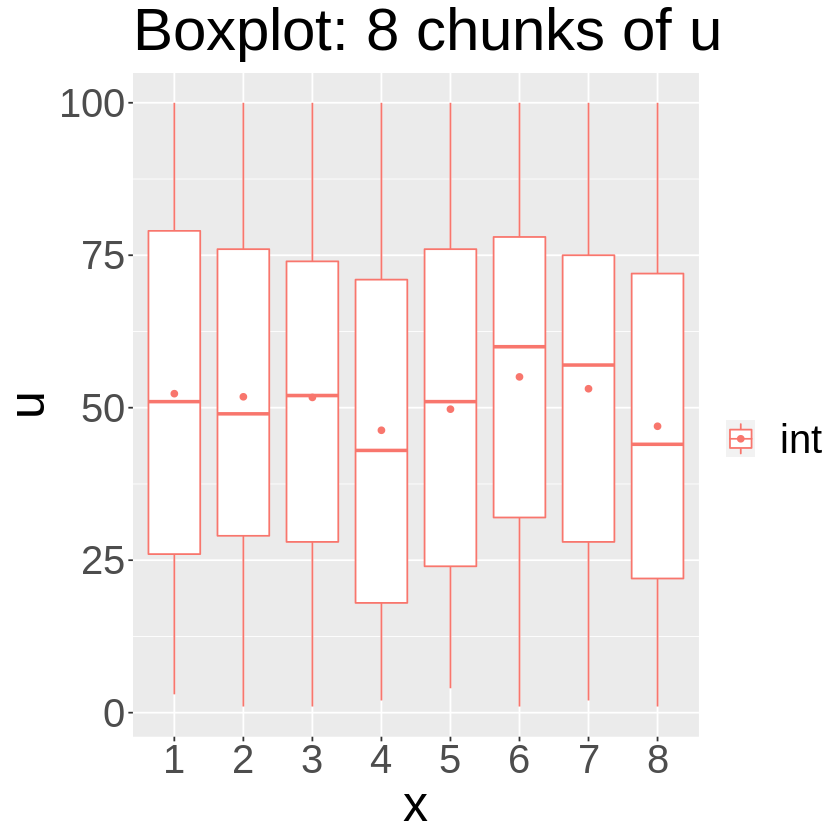

In [ ]:
ggplot () +
  geom_boxplot (aes(x=as.factor(x), y=u, color='int')) +
  geom_point (aes(x=as.factor(x), y=u, color='int'), stat = 'summary') +
    theme(text = element_text(size=30)) + 
  xlab("x") + ylab("u") +  labs(color = "", fill = "") +
  ggtitle ("Boxplot: 8 chunks of u") 

# **6. Pizza Chart**

Os gráficos de pizza são "empilhamentos" de colunas de um gráfico de barras, torcidos no centro por coordenadas polares.
É assim que o ggplot trata a criação de gráficos pizza!

Para demonstrar esse "empilhamento", primeiramente é criado um gráfico de barras; neste caso será utilizada a soma dos elementos em cada oitava parte do vetor _u_, baseando-se no mapeamento do vetor _x_.

A organização ocorre com as barras lado a lado.


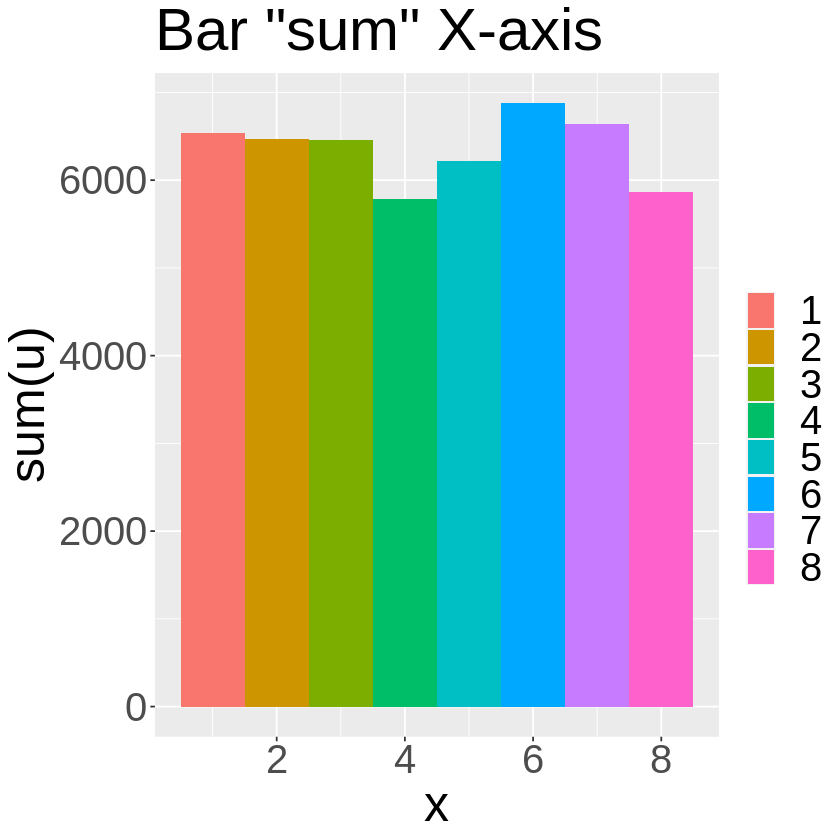

In [ ]:
ggplot () +
  geom_bar(aes(x=x, y=u, fill=as.factor(x)), stat = "identity", width = 1) +
    theme(text = element_text(size=30)) + 
  xlab("x") + ylab("sum(u)") +  labs(color = "", fill = "") +
  ggtitle ("Bar \"sum\" X-axis") 


Then you create the polar coordinate indicating that the y-axis is where the twist occurs.
However, such a torsion will produce a circular graph, with several rings...
No "stacking" was performed...

**coord_polar(theta = "y")**

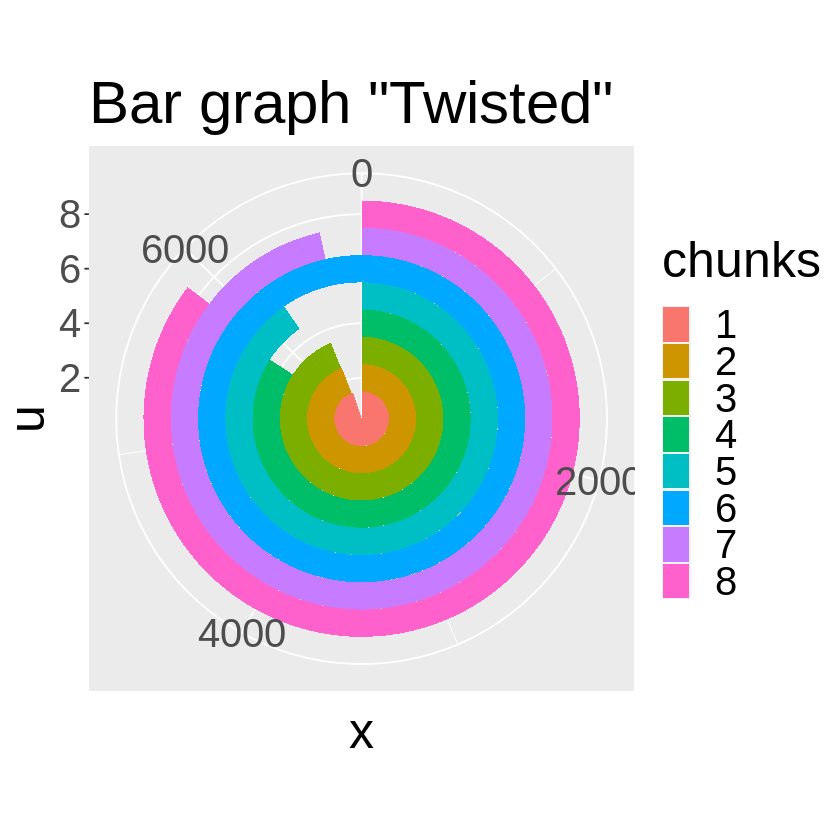

In [ ]:
ggplot () +
  geom_bar(aes(x=x, y=u, fill=as.factor(x)), stat = "identity", width = 1) + 
  coord_polar(theta = "y") +
  theme(text = element_text(size=30)) + 
  xlab("u") + ylab("x") +  labs(color = "", fill = "chunks") +
  ggtitle ("Bar graph \"Twisted\"") 

By making the value of X=1, in the _aesthetic_ of the ggplot, stacking will occur and then the twist will work correctly.

geom_bar(aes(**x=1**, y=u, fill=as.factor(x)), stat = "identity", width = 1)

[1] 50872


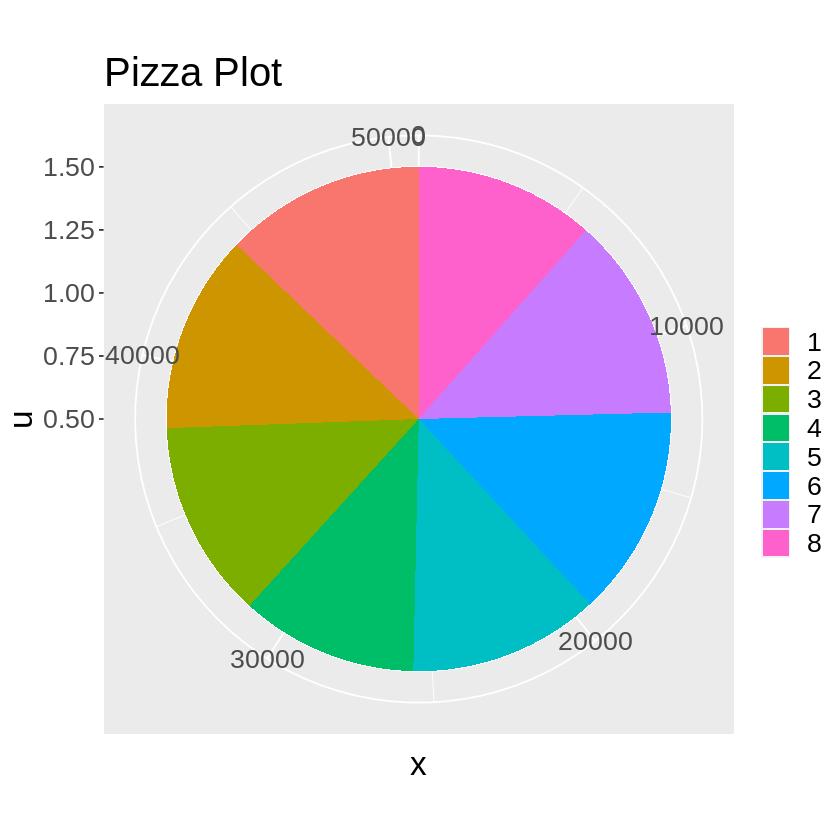

In [ ]:
ggplot () +
  geom_bar(aes(x=1, y=u, fill=as.factor(x)), stat = "identity", width = 1) + 
  coord_polar(theta = "y") +
    theme(text = element_text(size=20)) + 
  xlab("u") + ylab("x") +  labs(color = "", fill = "") +
  ggtitle ("Pizza Plot") 

print (sum(u))

# **7. Plus... or not**

Violin chart and jitter of the points in each of the 8 parts, how the points are distributed by random number generation...

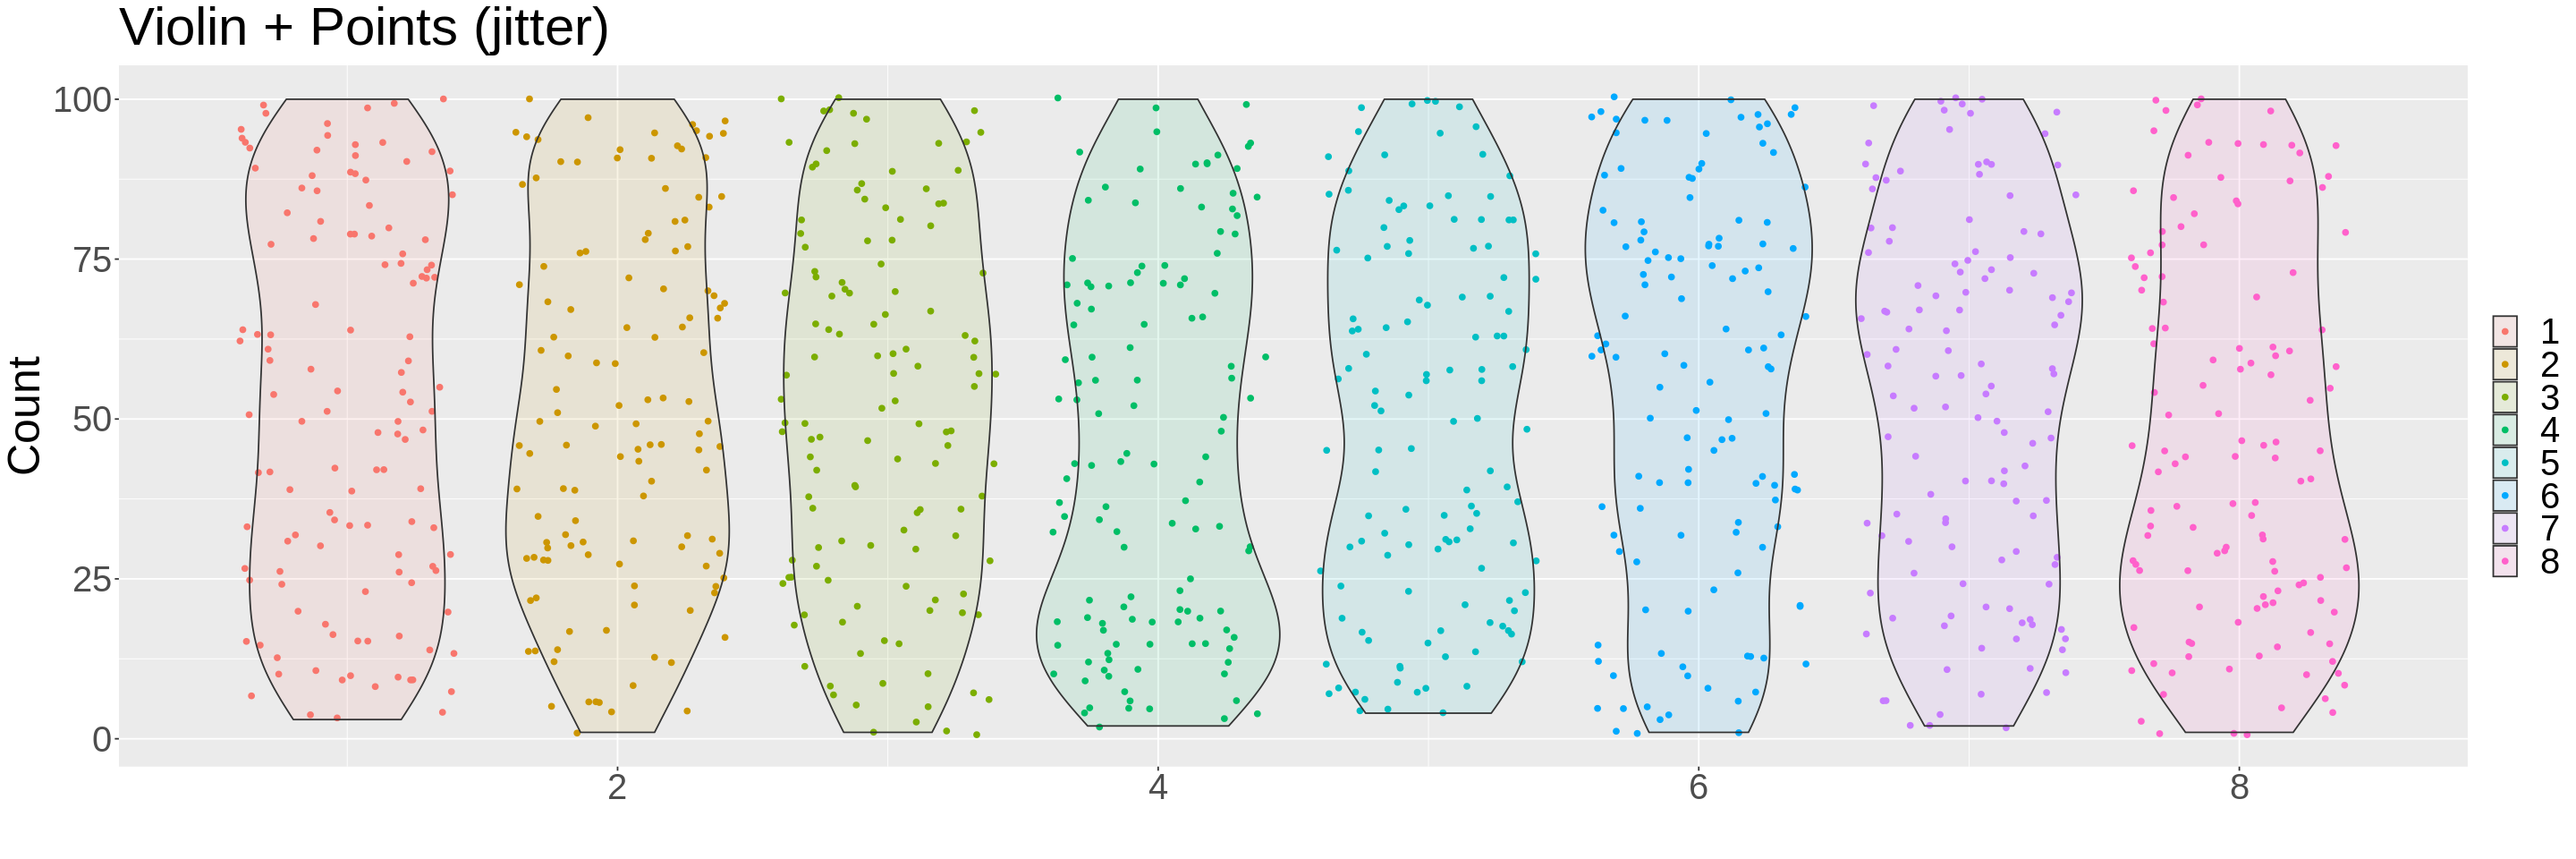

In [ ]:
saved <- options(repr.plot.width=24, repr.plot.height=8)
ggplot () +
  geom_jitter(aes(x=x, y=u, color=as.factor(x))) + 
  geom_violin(aes(x=x, y=u, fill=as.factor(x)), alpha =0.1) +
  theme(text = element_text(size=30)) + 
  xlab("") + ylab("Count") +  labs(color = "", fill = "") +
  ggtitle ("Violin + Points (jitter)") 

options(saved)

# **8. Moving Average**

Moving average is a process with many functions in R. But to code it by hand, loops would be needed and R is known to be bad, inefficient or crappy when used with loops. So... 

In getting around the problem of not being able to install packages in _google colabs_ using R, the apply function was used. It is an implicit loop...

Apply applies a given function to the entire length of the requested domain, for example:

*apply(embed(u, k), 1, mean)*

The function _embed_ groups values into _k_ sizes; so it will create groups of the vector _u_ with size _k_, and the apply function will apply the function _mean_ to each group created by _embed_, walking from 1 to 1 the positions in u... Moving Average!

But there are problems, as always. NAs, which are undef values, are inserted because there are no values before the origin of the vector _u_, to adjust for this in the center of the curve, _ini_ and _end_ are calculated, centering the positions of the vector that gets the moving average.

The result can be seen in the graph below, where several _k_ have been defined to visualize the amortizing effect of the moving average.

Random integer, set of 1000 numbers ranging from 1 to 100.

[1]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[13]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[25] 50.52 51.00 51.30 51.22 50.44 49.52 50.22 51.06 50.36 49.06 49.06 50.00
[37] 49.64 50.18 49.92 49.32 50.82 50.84 49.60 50.14 50.20 51.14 50.58 49.72
[49] 49.46 49.18

[1] 48.88 48.58 47.10 48.72 48.72 48.46 47.32 46.00 44.98 45.38 45.78 45.42
[13] 45.60 45.36 44.80 44.32 44.86 43.74 44.62 45.26 46.82 47.42 46.80 45.86
[25] 46.62    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[37]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[49]    NA    NA

Warning message:
“Removed 9 row(s) containing missing values (geom_path).”
Warning message:
“Removed 49 row(s) containing missing values (geom_path).”
Warning message:
“Removed 99 row(s) containing missing values (geom_path).”
Warning message:
“Removed 199 row(s) containing missing values (geom_path).”


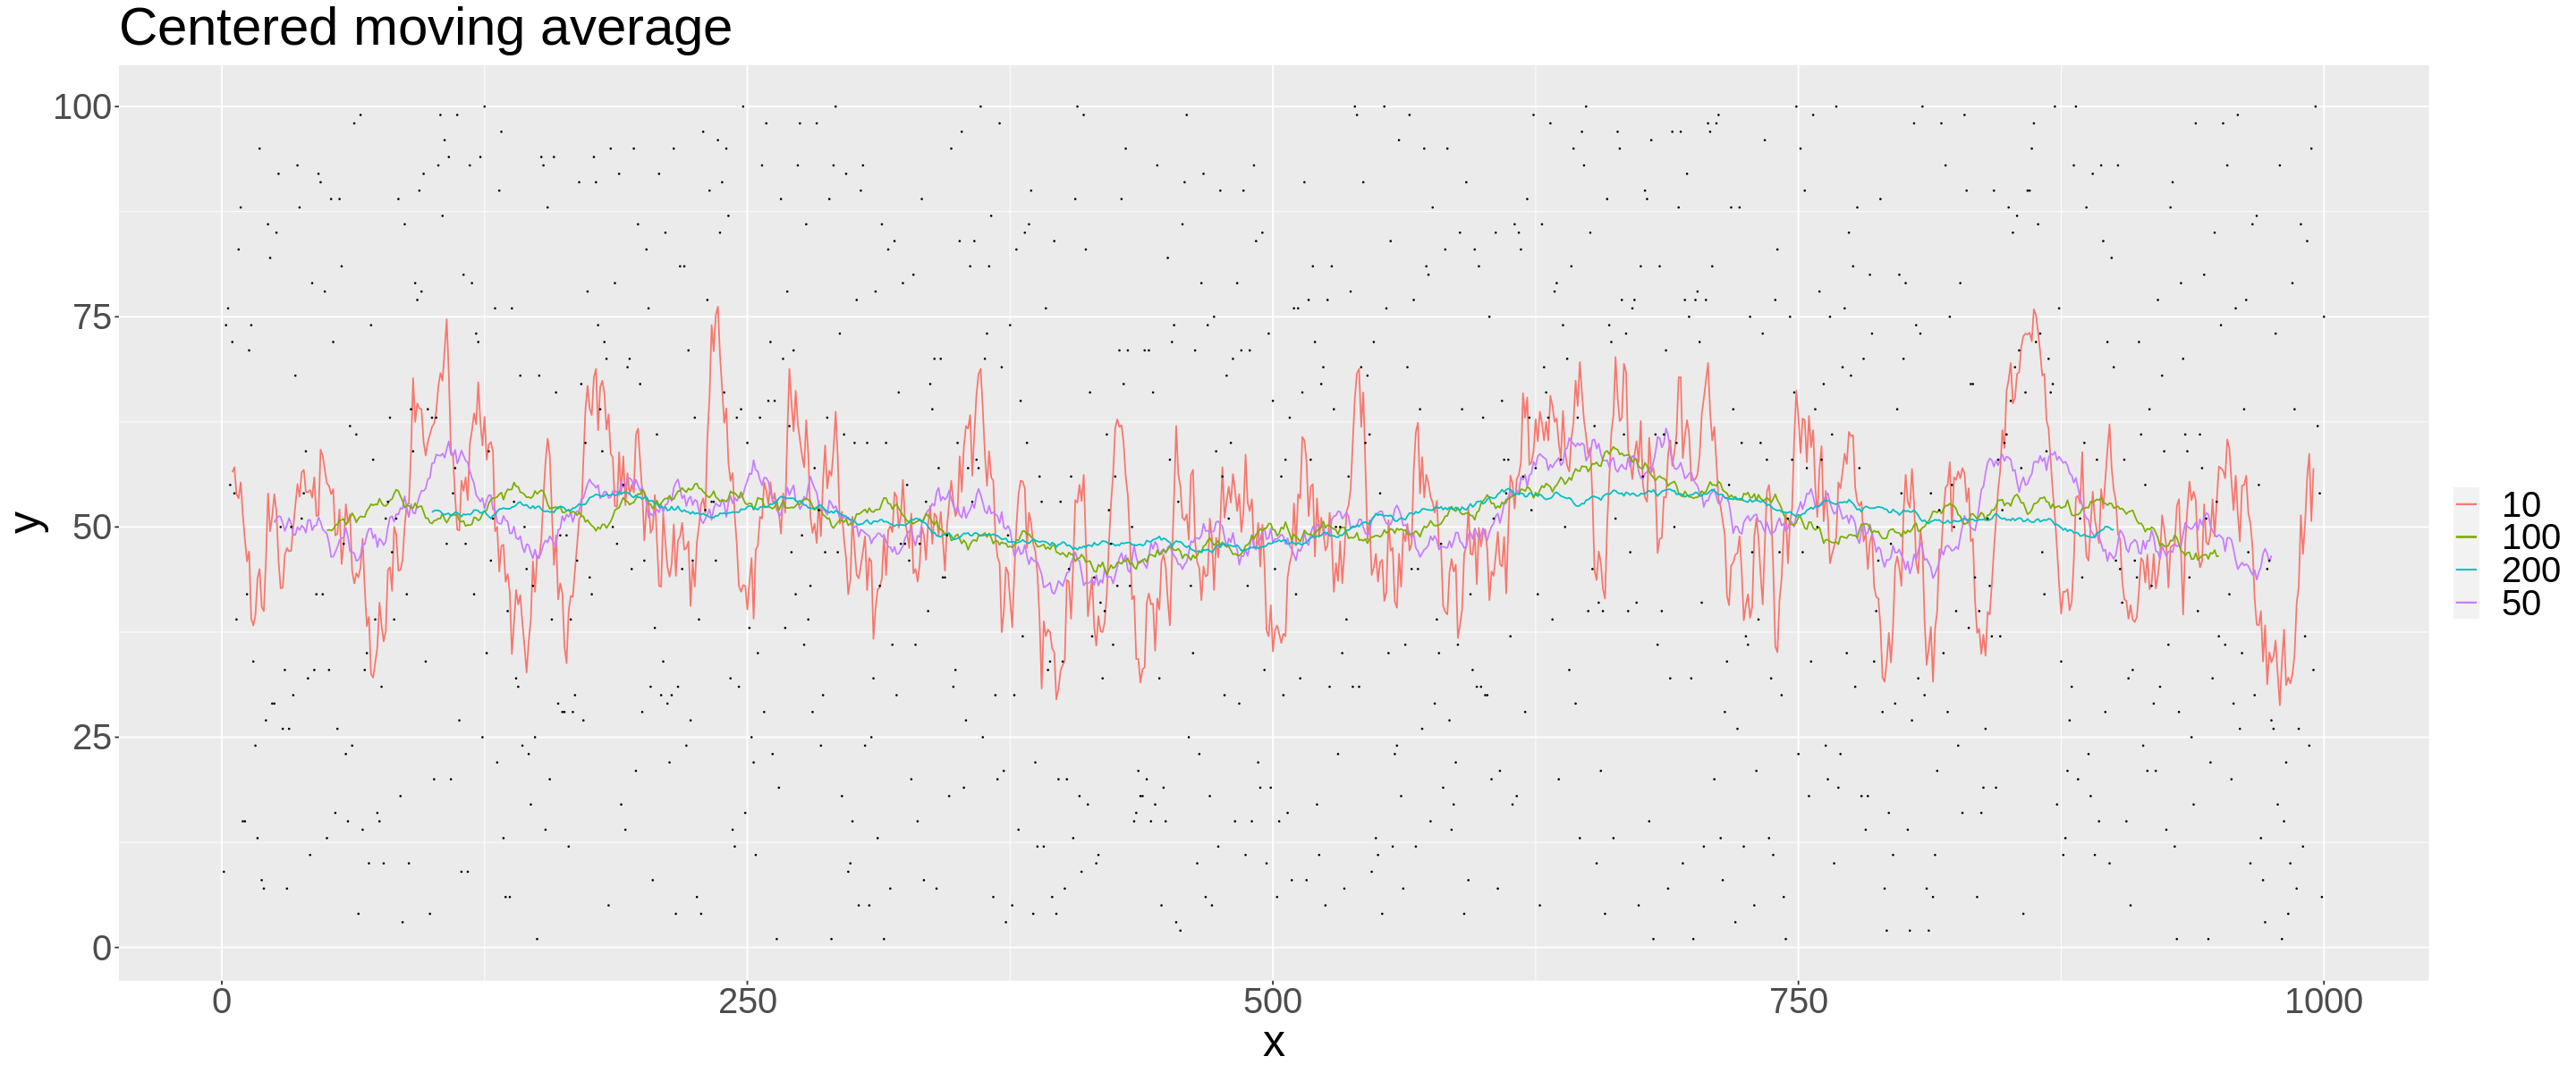

In [ ]:
require (ggplot2)

seed <- c(10)
n <- 100
r <- 1000

set.seed (seed); u <- sample.int(n, r, replace = TRUE) # sample.int does an uniform distribution

mov_mean <- u * NA

k <- 50     # by 50 elements
ini <- ceiling(k/2)
end <- ini + length(u) -k

mov_mean <- u * NA
mov_mean[ini:end] <- apply(embed(u, k), 1, mean)

head (mov_mean,k) # to verify the insertions of NAs, if it is correct
tail(mov_mean,k) # to verify the insertions of NAs, if it is correct

k <- 100
ini <- ceiling(k/2)
end <- ini + length(u) -k

mov_mean2 <- u * NA
mov_mean2[ini:end] <- apply(embed(u, k), 1, mean)

k <- 200
ini <- ceiling(k/2)
end <- ini + length(u) -k

mov_mean3 <- u * NA
mov_mean3[ini:end] <- apply(embed(u, k), 1, mean)


k <- 10
ini <- ceiling(k/2)
end <- ini + length(u) -k

mov_mean4 <- u * NA
mov_mean4[ini:end] <- apply(embed(u, k), 1, mean)


saved <- options(repr.plot.width=24, repr.plot.height=10)
ggplot() +
  geom_line(aes(x=1:1000, y=mov_mean4, color = '10')) +
  geom_line(aes(x=1:1000, y=mov_mean, color = '50')) +
  geom_line(aes(x=1:1000, y=mov_mean2, color = '100')) +
  geom_line(aes(x=1:1000, y=mov_mean3, color = '200')) + 
  geom_point(aes(x=1:1000, y=u), size = 0.1) +
  theme(text = element_text(size=30)) + 
  xlab("x") + ylab("y") +  labs(color = "size w", fill = "") +
  ggtitle ("Centered moving average") 
options (saved)

# **10. Geometric and Toy Case**

For geometric representations and _toy cases_, a series of points approximating an ellipse is presented. Centered at the origin of a Cartesian graph, (0,0), it has mean, median, and sum equal to 0. This occurs because all the upper points are mirrored downward. 
The value of the variance increases as the factor _b_ and the distance to the mean (which passes through the origin) increases, in other words, the _range_ increases. 
The standard deviation is always close to the mean for the upper or lower curves of the ellipse, the positive or negative half, as if it were a measure of bias for mean correction.

A set of points forming an ellipse should also have statistical index behaviors similar to sinusoids, since the x-axis is being disregarded, unlike a time series.

Descriptive statistics deals only with the data on the y-axis, the occurrences, regardless of the distribution on x, which happens in a time series.


## 1.1. **Ellipse I**

* Ellipse Equation: x^2/a^2 + y^2/b^2 = 1
* points defined in the range -2.5 to 2.5 with 0.1 increment (x)
* a = 5
* b = 1




Loading required package: ggplot2

Warning message in sqrt(1 - x1^2/a):
“NaNs produced”


[1] "min =  -1 - min value of ellipse, red dot"
[1] "max =  1 - max value of the ellipse, blue dot"
[1] "sum:  351.244931018622 -351.244931018622 = -2.77555756156289e-17 - Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"
[1] "mean =  1.36434837141632e-22 - It is like the sum of the two curves, but dividing by 2, zero too (black dashed)"
[1] "median:  0 - Center values:  0.0736206492772215 -0.0736206492772237 the ellipse have mirrored points (yellow dotted)"
[1] "range =  2 - Distance between max and min (green line)"
[1] "variance =  0.667733572228443 - Measure of dispersion, how far it is from the global average (grey line)"
[1] "std. deviation (dotted lines) =  0.81714966329825 - Mean of upper curve =  0.785782843442108 (blue or red line)"
[1] "How next are the points from the mean of the ellipse. It is closely (dotted) to the half curve (blue or red) mean (line), like a bias..."


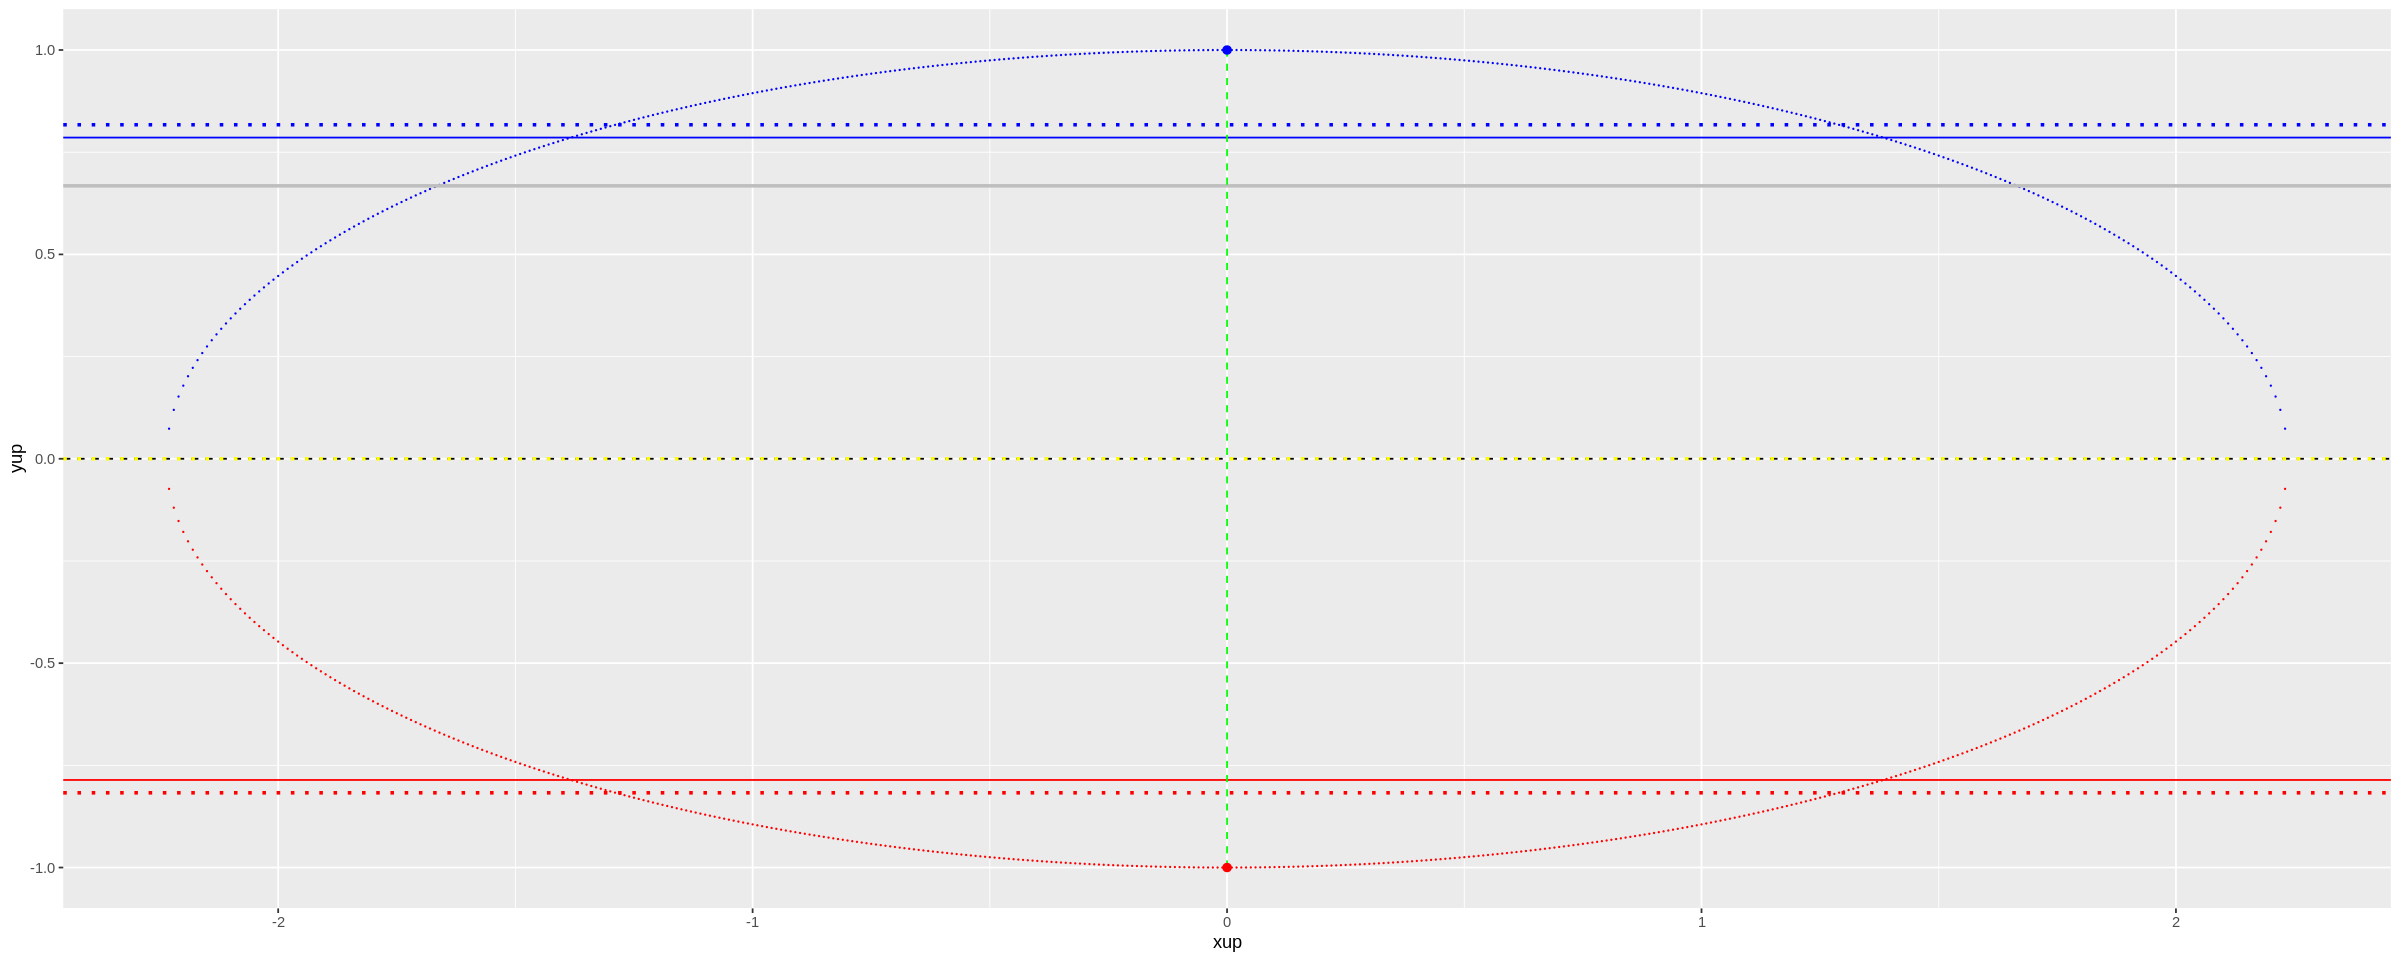

In [ ]:
require (ggplot2)

a <- 5
b <- 1
x1 <- seq(-2.5, 2.5, 0.01) # x values for the ellipse, from -2.5 to 2.5, by 0.01
y1 <- b*sqrt (1 - x1^2/a)  # y values of half a ellipse, the upper one


xup <- na.exclude(x1 +y1*0)
yup <- na.exclude(y1)
  
xdw <- na.exclude(x1 +y1*0)
ydw <- na.exclude(-y1)

x <- c( x1, x1[length(x1):1])  # replicating values for X, to calculate the second half ot the ellipse
y <- c( y1, -y1) # positive half and the negative half

x <- na.exclude(x + y*0) # excludes NA because of negative square root from discretization
y <- na.exclude(y)

saved <- options(repr.plot.width=20, repr.plot.height=8)
ggplot()+
  geom_point (aes (x=xup, y=yup), color='blue', size=0.01) + 
  geom_point (aes (x=xdw, y=ydw), color='red', size=0.01) +
  geom_hline (aes (yintercept=mean(yup)), color= 'blue') +
  geom_hline (aes (yintercept=mean(ydw)), color= 'red') +
  geom_hline (aes (yintercept=mean(y)), color= 'black', size=0.5, linetype='dashed') +
  geom_hline (aes (yintercept=median(y)), color= 'yellow', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=median(y)+sd(y)), color= 'blue', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=median(y)-sd(y)), color= 'red', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=var(y)), color= 'grey', size=1, linetype='solid') +
  geom_segment(aes(x = 0, y = -b, xend = 0, yend = b), color='green', linetype='dashed') +
  geom_point (aes (x=0, y=b), size=2, color='blue') +
  geom_point (aes (x=0, y=-b), size=2, color='red') 
options (saved)
n <- length(x)

print (paste("min = ",min(y), "- min value of ellipse, red dot")) # top y value of the ellipse
print (paste("max = ", max(y), "- max value of the ellipse, blue dot")) # botton y value of the ellipse
print (paste("sum: ", sum(y[1:447]), sum(y[448:894]), "=", sum(y), "- Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"))
print (paste("mean = ", mean(y), "- It is like the sum of the two curves, but dividing by 2, zero too (black dashed)")) # mean of y values, 
print (paste( "median: ", median(y), "- Center values: ", y[n/2], y[n/2+1], "the ellipse have mirrored points (yellow dotted)"))
print (paste("range = ", max(y)-min(y), "- Distance between max and min (green line)"))

print (paste("variance = ", var(y), "- Measure of dispersion, how far it is from the global average (grey line)"))
print (paste("std. deviation (dotted lines) = ", sd(y), "- Mean of upper curve = ", mean(yup), "(blue or red line)"))
print ("How next are the points from the mean of the ellipse. It is closely (dotted) to the half curve (blue or red) mean (line), like a bias...")


## 1.2. **Ellipse II - Next to y=0**

* Ellipse Equation: x^2/a^2 + y^2/b^2 = 1
* points defined in the range -2.5 to 2.5 with 0.1 increment (x)
* a = 5
* b = 0.1


Warning message in sqrt(1 - x1^2/a):
“NaNs produced”


[1] "min =  -0.1 - min value of ellipse, red dot"
[1] "max =  0.1 - max value of the ellipse, blue dot"
[1] "sum:  35.1244931018622 -35.1244931018622 = -1.73472347597681e-18 - Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"
[1] "mean =  6.15851695430979e-24 - It is like the sum of the two curves, but dividing by 2, zero too (black dashed)"
[1] "median:  0 - Center values:  0.00736206492772215 -0.00736206492772237 the ellipse have mirrored points (yellow dotted)"
[1] "range =  0.2 - Distance between max and min (green line)"
[1] "variance =  0.00667733572228443 - Measure of dispersion, how far it is from the global average (grey line)"
[1] "std. deviation (dotted lines) =  0.081714966329825 - Mean of upper curve =  0.0785782843442108 (blue or red line)"
[1] "How next are the points from the mean of the ellipse. It is closely (dotted) to the half curve (blue or red) mean (line), like a bias..."


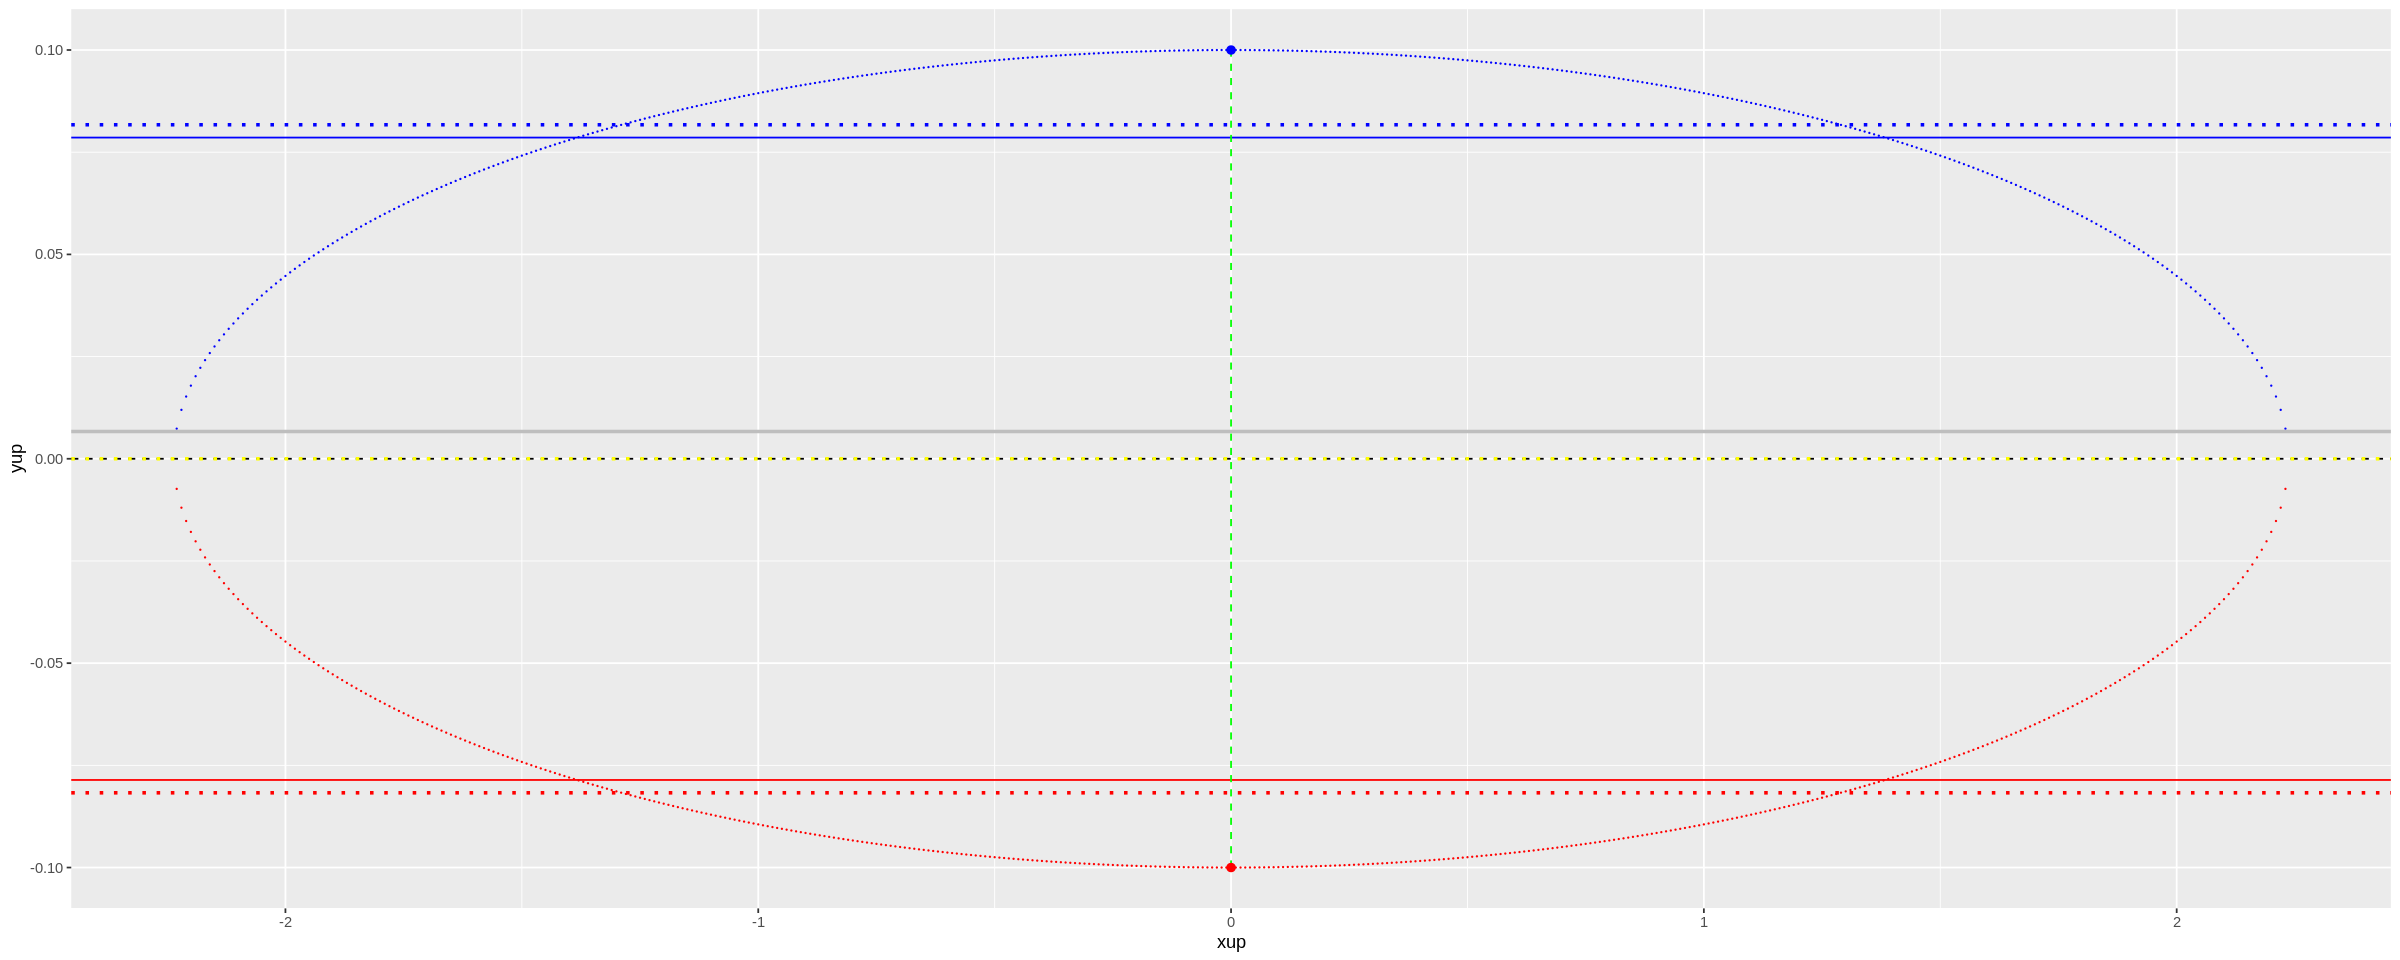

In [ ]:
require (ggplot2)

# For 'b' (height of the ellipse) next to 0
a <- 5
b <- 0.1
x1 <- seq(-2.5, 2.5, 0.01) # x values for the ellipse, from -2.5 to 2.5, by 0.01
y1 <- b*sqrt (1 - x1^2/a)  # y values of half a ellipse, the upper one


xup <- na.exclude(x1 +y1*0)
yup <- na.exclude(y1)
  
xdw <- na.exclude(x1 +y1*0)
ydw <- na.exclude(-y1)

x <- c( x1, x1[length(x1):1])  # replicating values for X, to calculate the second half ot the ellipse
y <- c( y1, -y1) # positive half and the negative half

x <- na.exclude(x + y*0) # excludes NA because of negative square root from discretization
y <- na.exclude(y)

saved <- options(repr.plot.width=20, repr.plot.height=8)
ggplot()+
  geom_point (aes (x=xup, y=yup), color='blue', size=0.01) + 
  geom_point (aes (x=xdw, y=ydw), color='red', size=0.01) +
  geom_hline (aes (yintercept=mean(yup)), color= 'blue') +
  geom_hline (aes (yintercept=mean(ydw)), color= 'red') +
  geom_hline (aes (yintercept=mean(y)), color= 'black', size=0.5, linetype='dashed') +
  geom_hline (aes (yintercept=median(y)), color= 'yellow', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=median(y)+sd(y)), color= 'blue', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=median(y)-sd(y)), color= 'red', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=var(y)), color= 'grey', size=1, linetype='solid') +
  geom_segment(aes(x = 0, y = -b, xend = 0, yend = b), color='green', linetype='dashed') +
  geom_point (aes (x=0, y=b), size=2, color='blue') +
  geom_point (aes (x=0, y=-b), size=2, color='red') 
options (saved)
n <- length(x)

print (paste("min = ",min(y), "- min value of ellipse, red dot")) # top y value of the ellipse
print (paste("max = ", max(y), "- max value of the ellipse, blue dot")) # botton y value of the ellipse
print (paste("sum: ", sum(y[1:447]), sum(y[448:894]), "=", sum(y), "- Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"))
print (paste("mean = ", mean(y), "- It is like the sum of the two curves, but dividing by 2, zero too (black dashed)")) # mean of y values, 
print (paste( "median: ", median(y), "- Center values: ", y[n/2], y[n/2+1], "the ellipse have mirrored points (yellow dotted)"))
print (paste("range = ", max(y)-min(y), "- Distance between max and min (green line)"))

print (paste("variance = ", var(y), "- Measure of dispersion, how far it is from the global average (grey line)"))
print (paste("std. deviation (dotted lines) = ", sd(y), "- Mean of upper curve = ", mean(yup), "(blue or red line)"))
print ("How next are the points from the mean of the ellipse. It is closely (dotted) to the half curve (blue or red) mean (line), like a bias...")


## 1.3. **Ellipse III - The Circle**

* Ellipse Equation: x^2/a^2 + y^2/b^2 = 1
* points defined in the range -2.5 to 2.5 with 0.1 increment (x)
* a = 3
* b = 3


Warning message in sqrt(1 - x1^2/a):
“NaNs produced”


[1] "min =  -3 - min value of ellipse, red dot"
[1] "max =  3 - max value of the ellipse, blue dot"
[1] "sum:  621.822556972171 NA = 2.77555756156289e-17 - Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"
[1] "mean =  -2.14809508237402e-22 - It is like the sum of the two curves, but dividing by 2, zero too (black dashed)"
[1] "median:  0 - Center values:  0.145945195193249 -0.145945195193263 the ellipse have mirrored points (yellow dotted)"
[1] "range =  6 - Distance between max and min (green line)"
[1] "variance =  5.99844329004329 - Measure of dispersion, how far it is from the global average (grey line)"
[1] "std. deviation (dotted lines) =  2.44917196008024 - Mean of upper curve =  2.35234206706291 (blue or red line)"
[1] "How next are the points from the mean of the ellipse. It is closely (dotted) to the half curve (blue or red) mean (line), like a bias..."


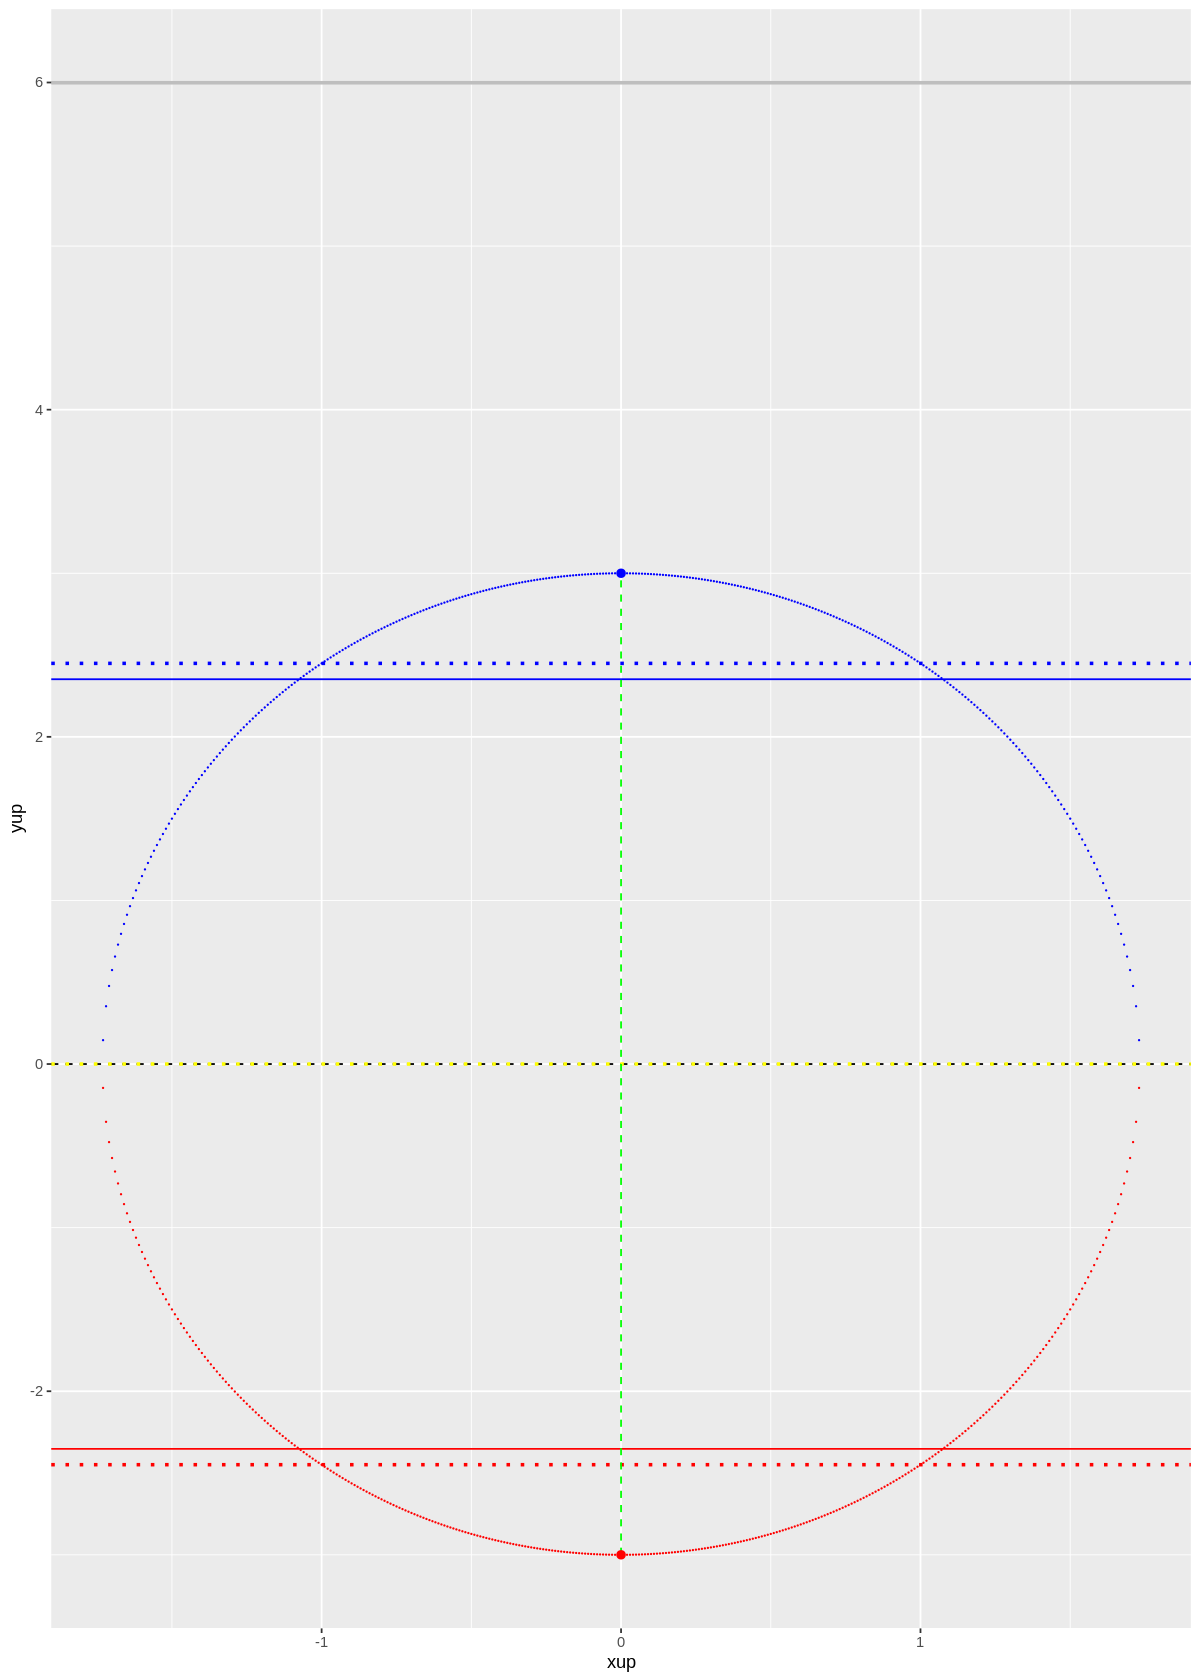

In [ ]:
require (ggplot2)


# For 'b' (height of the ellipse) equal 'a'
a <- 3
b <- 3
x1 <- seq(-2.5, 2.5, 0.01) # x values for the ellipse, from -2.5 to 2.5, by 0.01
y1 <- b*sqrt (1 - x1^2/a)  # y values of half a ellipse, the upper one


xup <- na.exclude(x1 +y1*0)
yup <- na.exclude(y1)
  
xdw <- na.exclude(x1 +y1*0)
ydw <- na.exclude(-y1)

x <- c( x1, x1[length(x1):1])  # replicating values for X, to calculate the second half ot the ellipse
y <- c( y1, -y1) # positive half and the negative half

x <- na.exclude(x + y*0) # excludes NA because of negative square root from discretization
y <- na.exclude(y)

saved <- options(repr.plot.width=10, repr.plot.height=14)
ggplot()+
  geom_point (aes (x=xup, y=yup), color='blue', size=0.01) + 
  geom_point (aes (x=xdw, y=ydw), color='red', size=0.01) +
  geom_hline (aes (yintercept=mean(yup)), color= 'blue') +
  geom_hline (aes (yintercept=mean(ydw)), color= 'red') +
  geom_hline (aes (yintercept=mean(y)), color= 'black', size=0.5, linetype='dashed') +
  geom_hline (aes (yintercept=median(y)), color= 'yellow', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=median(y)+sd(y)), color= 'blue', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=median(y)-sd(y)), color= 'red', size=1, linetype='dotted') +
  geom_hline (aes (yintercept=var(y)), color= 'grey', size=1, linetype='solid') +
  geom_segment(aes(x = 0, y = -b, xend = 0, yend = b), color='green', linetype='dashed') +
  geom_point (aes (x=0, y=b), size=2, color='blue') +
  geom_point (aes (x=0, y=-b), size=2, color='red') 
options (saved)
n <- length(x)

print (paste("min = ",min(y), "- min value of ellipse, red dot")) # top y value of the ellipse
print (paste("max = ", max(y), "- max value of the ellipse, blue dot")) # botton y value of the ellipse
print (paste("sum: ", sum(y[1:447]), sum(y[448:894]), "=", sum(y), "- Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"))
print (paste("mean = ", mean(y), "- It is like the sum of the two curves, but dividing by 2, zero too (black dashed)")) # mean of y values, 
print (paste( "median: ", median(y), "- Center values: ", y[n/2], y[n/2+1], "the ellipse have mirrored points (yellow dotted)"))
print (paste("range = ", max(y)-min(y), "- Distance between max and min (green line)"))

print (paste("variance = ", var(y), "- Measure of dispersion, how far it is from the global average (grey line)"))
print (paste("std. deviation (dotted lines) = ", sd(y), "- Mean of upper curve = ", mean(yup), "(blue or red line)"))
print ("How next are the points from the mean of the ellipse. It is closely (dotted) to the half curve (blue or red) mean (line), like a bias...")


## 1.4. **Ellipse IV - The Wave**

* Ellipse Equation: x^2/a^2 + y^2/b^2 = 1
* points defined in the range 0 to aprox. 700 with 0.1 increment (x) -> PONTOS DESLOCADOS EM X
* a = 3
* b = 3


Loading required package: ggplot2

Warning message in sqrt(1 - x1^2/a):
“NaNs produced”


[1] "min =  -3 - min value of ellipse, red dot"
[1] "max =  3 - max value of the ellipse, blue dot"
[1] "sum:  621.822556972171 NA = 2.77555756156289e-17 - Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"
[1] "mean =  -2.14809508237402e-22 - It is like the sum of the two curves, but dividing by 2, zero too (black dashed)"
[1] "median:  0 - Center values:  0.145945195193249 -0.145945195193263 the ellipse have mirrored points (yellow dotted)"
[1] "range =  6 - Distance between max and min (green line)"
[1] "variance =  5.99844329004329 - Measure of dispersion, how far it is from the global average (grey line)"
[1] "std. deviation (dotted lines) =  2.44917196008024 - Mean of upper curve =  2.35234206706291 (blue or red line)"


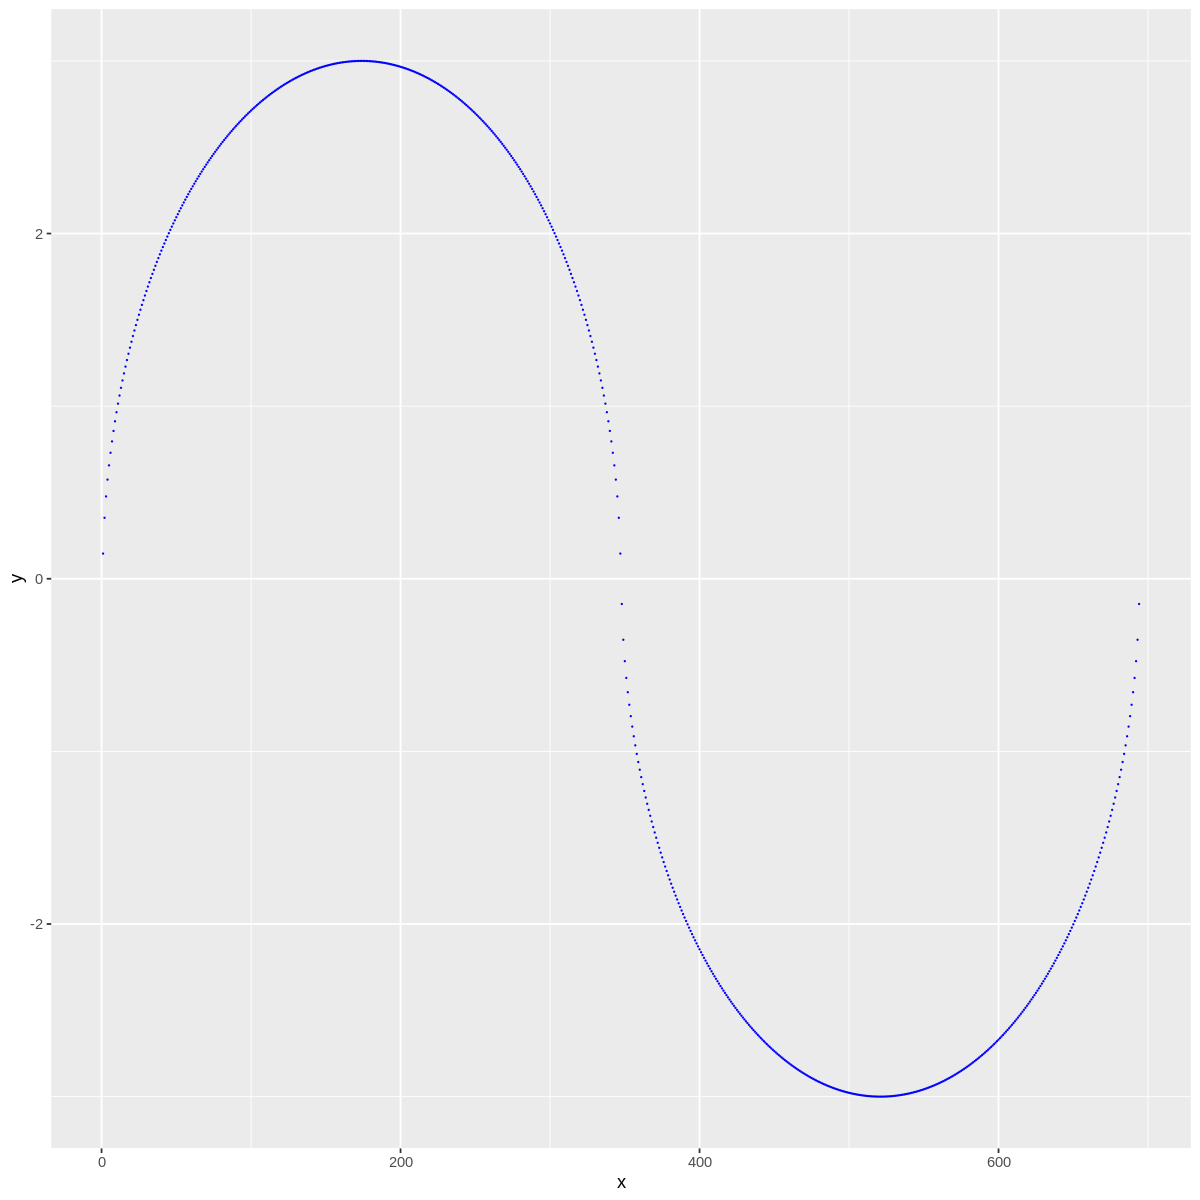

In [ ]:
require (ggplot2)


# For 'b' (height of the ellipse) equal 'a'
a <- 3
b <- 3
x1 <- seq(-2.5, 2.5, 0.01) # x values for the ellipse, from -2.5 to 2.5, by 0.01
y1 <- b*sqrt (1 - x1^2/a)  # y values of half a ellipse, the upper one


xup <- na.exclude(x1 +y1*0)
yup <- na.exclude(y1)
  
xdw <- na.exclude(x1 +y1*0)
ydw <- na.exclude(-y1)

x <- c( x1, x1[length(x1):1])  # replicating values for X, to calculate the second half ot the ellipse
y <- c( y1, -y1) # positive half and the negative half

y <- na.exclude(y)
x <- 1:length(y)

saved <- options(repr.plot.width=10, repr.plot.height=10)
ggplot()+
  geom_point (aes (x=x, y=y), color='blue', size=0.01) 
options (saved)
n <- length(x)

print (paste("min = ",min(y), "- min value of ellipse, red dot")) # top y value of the ellipse
print (paste("max = ", max(y), "- max value of the ellipse, blue dot")) # botton y value of the ellipse
print (paste("sum: ", sum(y[1:447]), sum(y[448:894]), "=", sum(y), "- Sum of the red curve with the blue one, it is next to zero, only because of numbers aproximations"))
print (paste("mean = ", mean(y), "- It is like the sum of the two curves, but dividing by 2, zero too (black dashed)")) # mean of y values, 
print (paste( "median: ", median(y), "- Center values: ", y[n/2], y[n/2+1], "the ellipse have mirrored points (yellow dotted)"))
print (paste("range = ", max(y)-min(y), "- Distance between max and min (green line)"))

print (paste("variance = ", var(y), "- Measure of dispersion, how far it is from the global average (grey line)"))
print (paste("std. deviation (dotted lines) = ", sd(y), "- Mean of upper curve = ", mean(yup), "(blue or red line)"))
